# Reading and Inspecting Data

## Data storage formats in files

Tabular data is stored in files in different formats, for example
- Excel
- CSV (Comma-separated Values)
- TSV (Tab-separated Values)

One of the most commonly used formats is ```CSV```, which uses ```commas``` to separate different values for each row of data

![csv.png](images/csv.png)

The ```TSV``` format is the same except it uses ```tabs``` as the separator between values for each row
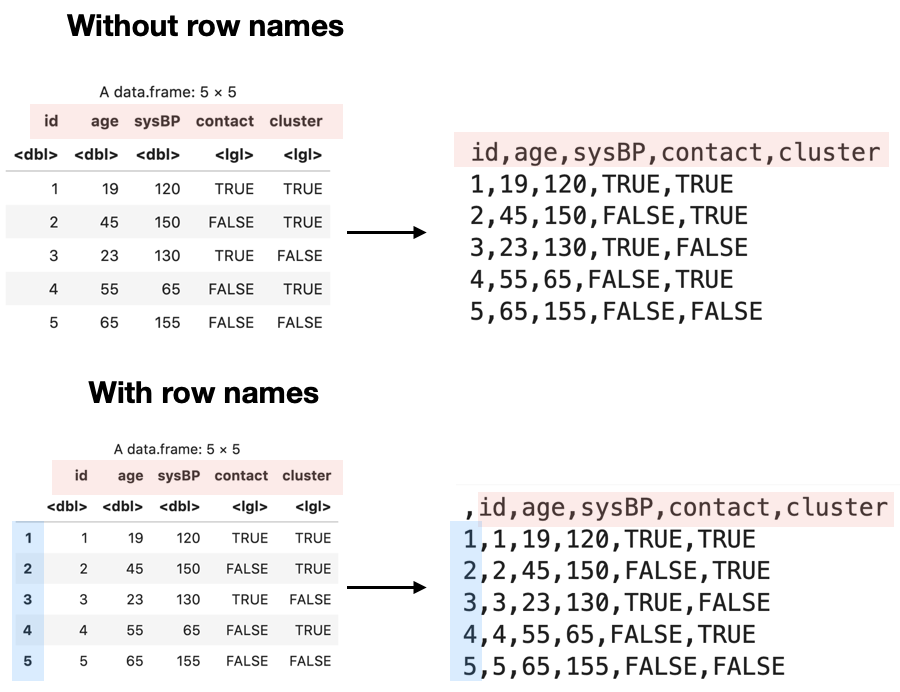

---
## Functions to read data

We can read data into R using the ```read.csv``` (base R) or ```read_csv``` (tidyverse). Both are able to read data from a locally stored file, or from a URL

    read_csv ("myfile.csv")
    read_csv ("https://some_website.edu/data/myfile.csv")

### 1. Importing data as a dataframe using base R
- We can import data from a csv file using ```read.csv``` which is a ```base``` R function
- Because this is a non-tidyverse function, it is imported as a ```dataframe```

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)


In [ ]:
# reading in data as a dataframe

df <- read.csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

We can use `head` and `tail` functions to inspect the first and last few cases in a data frame

In [ ]:
# we can use head to see the first few rows
head(df)

# we can use tail to see the last few rows
tail(df)

Recall that we can select a column from a dataframe by `index` or by `column name`

In [ ]:
# select by index of column

df[,1]

In [ ]:
# select by name of column using $ selector

df$male

In [ ]:
# select by name of column using [] selector

df["male"]

When subsetting a `data frame`
- ```df[,1]``` returns a `vector` of the 1st column (male)
- ```df$male``` returns a `vector` of the male column
- ```df["male"]``` returns a `dataframe` of the male column

![subset_df.png](images/subset_df.png)
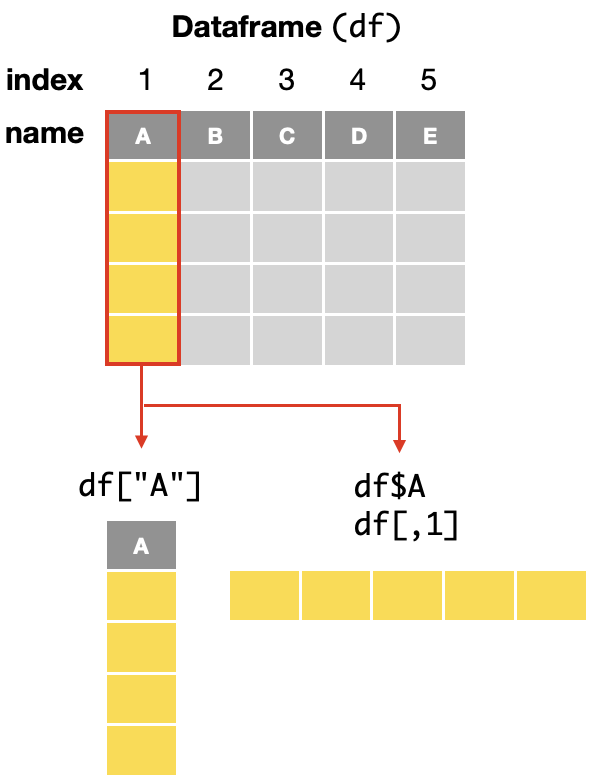

### 2. Importing data as a tibble
- We will import data from a csv file using ```read_csv```from ```tidyverse```
- The data will be imported as a `tibble`, which is an "enhanced" dataframe that provides more information and warnings to reduce errors
- The subsetting of a tibble is **slightly different** from the dataframe

In [ ]:
library(tidyverse)

# reading in data as a tibble

data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

When we inspect the data type, we note that it is a `tibble` (tbl) and not a standard dataframe

In [ ]:
class(data)

We can take a look at the first and last few rows of the tibble

In [ ]:
# see first few rows
head(data)

# see last few rows
tail(data)

We can select a column from the tibble by `index` or by `column name`

In [ ]:
# select by index of column

data[,1]

In [ ]:
# select by name of column using $ selector

data$male 

In [ ]:
# select by name of column using [] selector

data["male"]

When subsetting a tibble `data`
- ```data[,1]``` returns a `tibble` of the 1st column (male)
- ```data$male``` returns a `vector` of the male column
- ```data["male"]``` returns a `tibble` of the male column

Note that the **difference** when subsetting a dataframe `df`
- ```df[,1]``` returns a vector of the 1st column

![subset_tibble.png](images/subset_tibble.png)
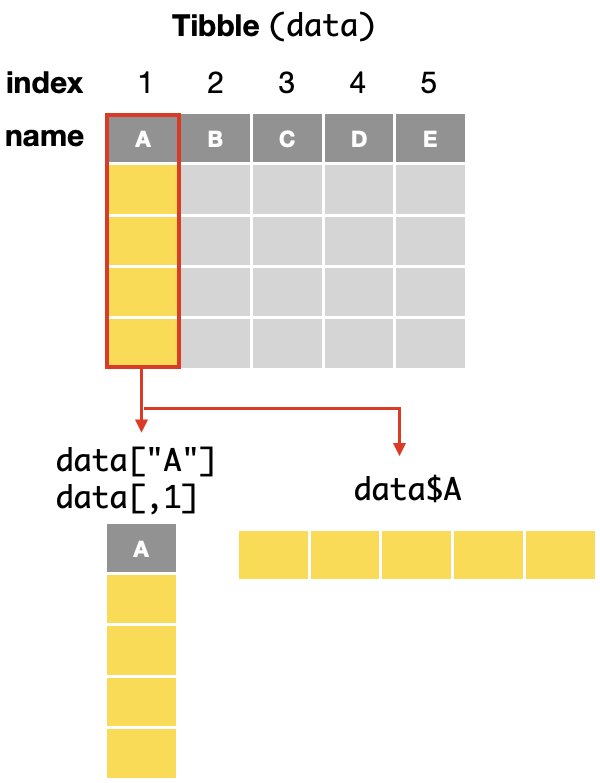

## Why does it matter if it's a dataframe or a tibble?
- Some non-tidyverse functions do not understand what a tibble is, and can only accept a vector
- Subsetting a tibble incorrectly may return a tibble that cannot be processed by a function that expects a vector

Let us compare what happens when we subset a `dataframe` (df) or a `tibble`  (data) by index and pass it to the function `mean` that accepts a `vector`

In [ ]:
# subsetting a dataframe by index

df[,2] %>% mean()

In [ ]:
# subsetting a tibble by index

data[,2] %>% mean()

To avoid this confusion, subsetting by the ```$``` selector would return a **vector** for **both** cases that can be processed by many non-tidyverse functions

In [ ]:
# $ returns a vector from a dataframe

df$age %>% mean()

In [ ]:
# $ returns a vector from a tibble

data$age %>% mean()

---
## Exercise - Reading Data

We will import a small dataset about smoking and BP as described here: https://vincentarelbundock.github.io/Rdatasets/doc/COUNT/smoking.html

The variables include
- `sbp`: systolic BP
- `male` : 0 = female, 1 = male
- `age` : age of patient
- `smoker` : 0 = no history of smoking, 1 = history of smoking

The URL (weblink) for this dataset is `https://raw.githubusercontent.com/kennethban/dataset/main/smoking_sbp.csv`

### Part 1

Read the csv file using ```read_csv``` and store it in a variable ```smoking```

In [ ]:
# start here

In [ ]:
# solution

smoking <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/smoking_sbp.csv")

In [ ]:
# inspect it

smoking

### Part 2

Find out the ```mean``` and ```median``` of the systolic blood pressure by subsetting the `smoking` tibble

In [ ]:
# start here

In [ ]:
# solution

smoking$sbp %>% mean()
smoking$sbp %>% median()

### Part 3

Find out the number of smokers and non-smokers by subsetting the `smoking` tibble and using the `table` function

In [ ]:
# start here

In [ ]:
# solution

table(smoking$smoker)